# Clustering Technique for the Mall Customers Dataset
Done by **Rayen Fares** 

## Introduction

In this notebook, we will be clustering the [Mall customers](https://www.kaggle.com/datasets/shwetabh123/mall-customers) dataset
from Kaggle. This dataset contains information about 200 customers, including their age, gender, annual income, and spending score. We will use clustering to group these customers into different segments based on their similarities. This information can be used by the mall management to better understand their customers and target their marketing campaigns more effectively.

Once the dataset is downloaded, we can load it into a Pandas DataFrame. The DataFrame will have the following columns:

* `CustomerID`: A unique identifier for each customer
* `Age`: The customer's age
* `Gender`: The customer's gender
* `AnnualIncome`: The customer's annual income
* `SpendingScore`: The customer's spending score

We can use the `sklearn.cluster` library to cluster the customers in the DataFrame. There are many different clustering algorithms available in `sklearn.cluster`. In this notebook, we will use the `KMeans` algorithm. The `KMeans` algorithm works by iteratively assigning each customer to the cluster with the closest mean.

We can use the `fit()` method of the `KMeans` class to train the model on the DataFrame. The `fit()` method will return the cluster labels for each customer. We can then use these cluster labels to group the customers together.

Once the customers have been clustered, we can analyze the different segments to better understand the mall's customers. For example, we can compare the average age, annual income, and spending score of the different segments. We can also use the cluster labels to target marketing campaigns more effectively.

Clustering is a powerful tool that can be used to gain insights into customer behavior. By clustering the `Mall Customers` dataset, we can better understand the mall's customers and target their marketing campaigns more effectively.

In [48]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.Data preprocessing

In [8]:
# Load the dataset
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
#Shape of the dataset
df.shape

(200, 5)

In [12]:
## Statistical summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
# Check for duplicates
df.duplicated().sum()

0

In [21]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

*We can notice that our dataset is already clean! We have neither duplicate nor null values so we can continue our analysis.*

In [34]:
df = df.drop(['CustomerID'], axis=1)

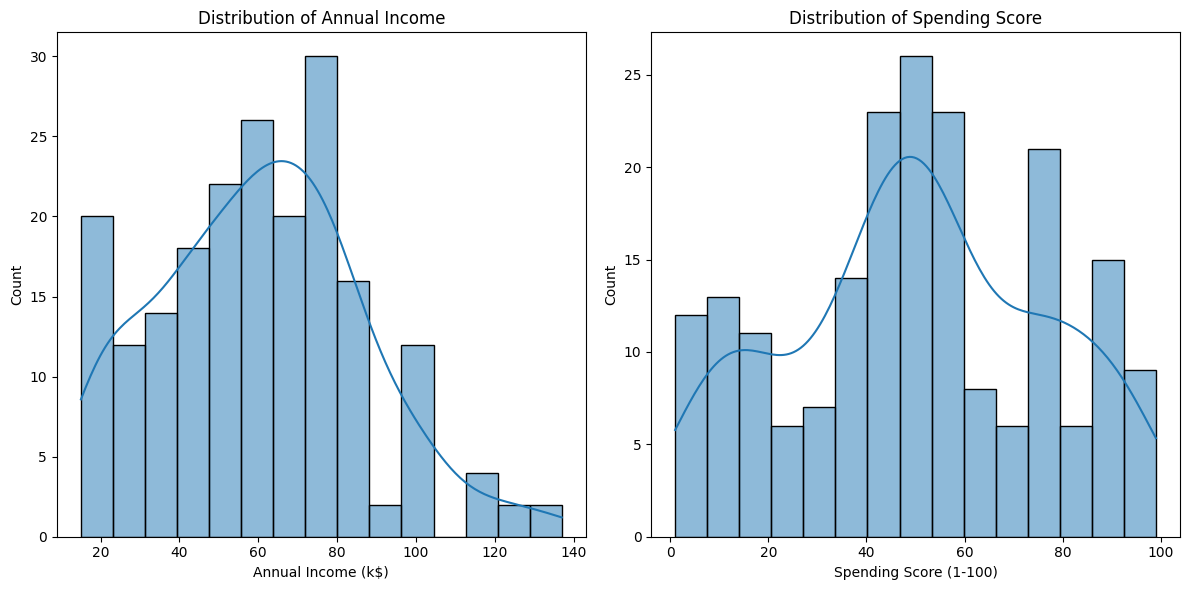

In [26]:
## Distribution of variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

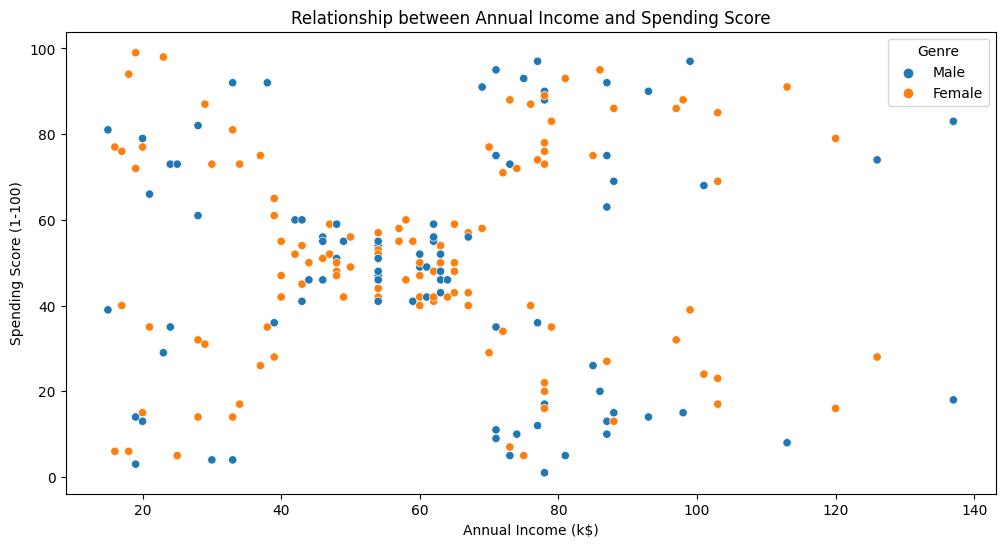

In [33]:
## Relationship between variables
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Relationship between Annual Income and Spending Score')

plt.show()

The plot can show that the we can divide customers into 5 categories:

- Category 1: Customers with high annual income and high spending score.
- Category 2: Customers with high annual income and low spending score.
- Category 3: Customers with medium annual income and medium spending score.
- Category 4: Customers with low annual income and high spending score.
- Category 5: Customers with low annual income and low spending score.

The scatter plot shows that there is a positive correlation between annual income and spending score. This means that customers with higher annual incomes tend to have higher spending scores. There is also a difference in the spending habits of men and women. Women tend to have higher spending scores than men!

### 2. K-Means Clustering (Annual Income and Spending Score):

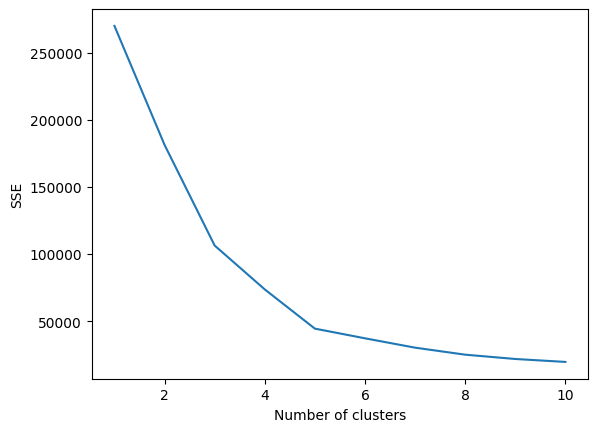

In [46]:
# Select the features we want to use for clustering
features = df.iloc[:, [2,3]].values
# Create an elbow plot to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

We can see from the elbow plot that the optimal number of clusters is **5** as we have predcited before! <br>
So we will build our model based on 5 clusters!

In [52]:
# K-means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

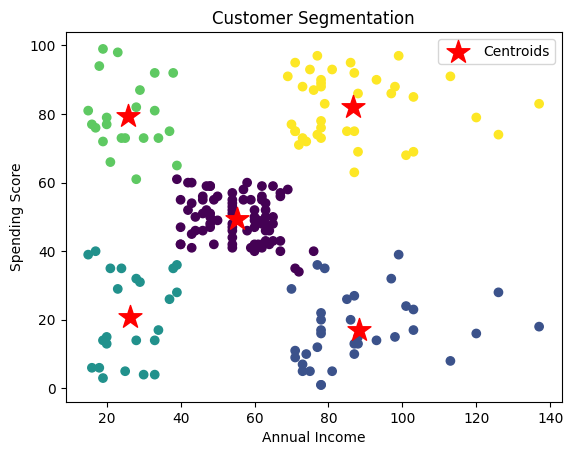

In [64]:
# Assign cluster labels to the data points
labels = kmeans.labels_

# Add the cluster labels to the original dataset
df['Cluster'] = labels

# Visualize the clusters
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

**Conclusion:** <br>
As agreed before we can divide our customers into 5 clusters depending on their annual income in relationship with their spending score:
- Yellow Cluster 1: Customers with high annual income and high spending score.
- Blue Cluster 2: Customers with high annual income and low spending score.
- Purple Cluster 3: Customers with medium annual income and medium spending score.
- Green Cluster 4: Customers with low annual income and high spending score.
- Light blue Cluster 5: Customers with low annual income and low spending score.

### 3. K-Means Clustering (Customers' Age and Spending Score):

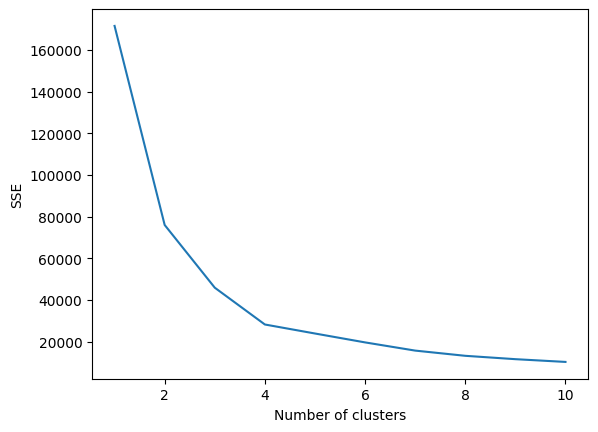

In [78]:
# Select the features we want to use for clustering
features = df.iloc[:, [1,3]].values
# Create an elbow plot to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

This time we can see from the elbow plot that the optimal number of clusters is **4** <br>
So we will build our model based on 4 clusters!

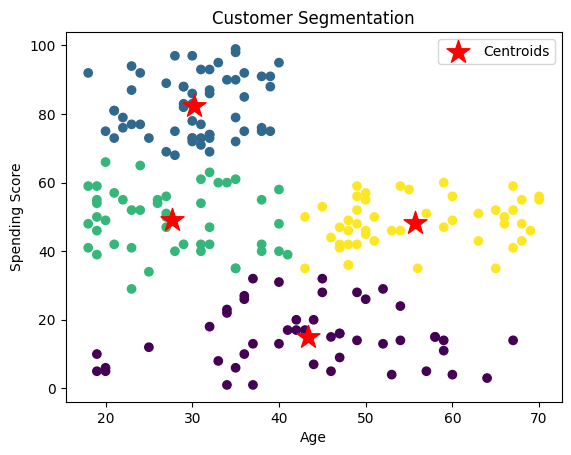

In [79]:
# K-means Clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(features)

# Assign cluster labels to the data points
labels = kmeans.labels_

# Add the cluster labels to the original dataset
df['Cluster'] = labels

# Visualize the clusters
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

*There is not a strong positive correlation between age and spending score;* customers of all ages can spend small amounts of money, but we can notice that **customers with the highest paying ratio are aged between 20 to 40.**

## Conclusion

* K-means clustering was applied to partition customers into five clusters based on their annual income and spending score.
* The clustering outcomes reveal a positive relationship between annual income and spending score, indicating that customers with higher annual incomes tend to exhibit higher spending scores.
* The clustering results offer valuable insights for targeted marketing campaigns. For instance, the mall can focus on the cluster of customers with high annual income and high spending scores by tailoring marketing initiatives specifically for luxury goods and experiences.
* The clustering results can also be used to track changes in customer behavior over time. For example, the mall can track whether the cluster of customers with high annual income and high spending scores is growing or shrinking.

Overall, the clustering results can provide valuable insights into the different segments of customers in the mall. This information can be used by the mall management to target their marketing campaigns more effectively and to better understand their customers.